In [7]:
import numpy as np  #importing necessary libraries to build the machine learning model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 


In [32]:
advert_df= pd.read_csv("advertising.csv") # loading the csv dataset and loking at its shape using info()
print(advert_df.head())
advert_df.info()



      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


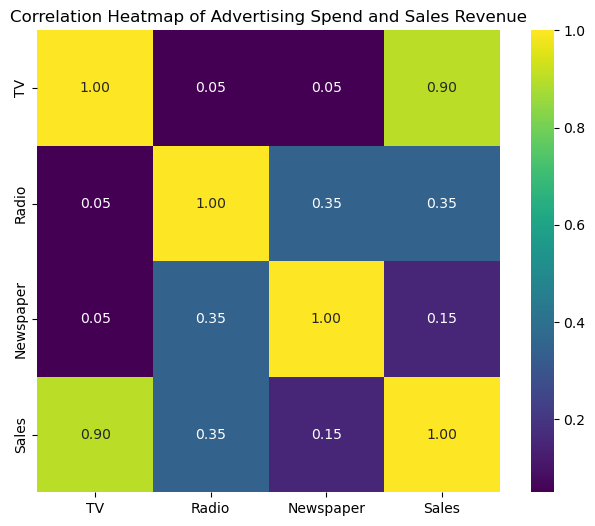

In [29]:
#checking for correlations betwen te various advertising spend and sales revenue 
correlation_matrix = advert_df.corr() 
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,fmt=".2f",annot=True, cmap="viridis" ,square= True)
plt.title('Correlation Heatmap of Advertising Spend and Sales Revenue')
plt.show()
#sns.pairplot(advert_df)
#plt.show()

Mean Squared Error: 3.0036983167095093
R² Score: 0.8879190891395372


C:\Users\t_ongep\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


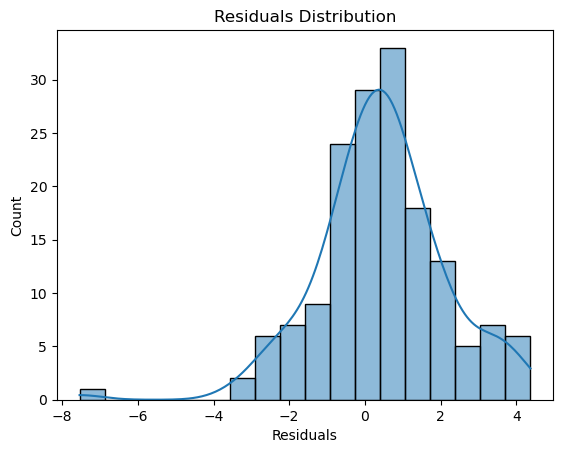

In [33]:
#lets split the data into features and target variable which is sales.
X = advert_df[["TV","Radio","Newspaper"]]
y = advert_df["Sales"]

#split the advert data into training and test set using train test split
X_test,X_train,y_test,y_train = train_test_split(X,y, test_size= 0.2,random_state = 42)

#Linear regression model
model = LinearRegression()
model.fit(X_train,y_train)  #training the model

#make predictions on the test using the trained model
y_pred = model.predict(X_test)

#Mean Squared Error (MSE) and R² score calculations to determine the model's performance.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

residuals = y_test - y_pred  #Residual analysis
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()



           Coefficient
TV            0.053860
Radio         0.128354
Newspaper    -0.006290

Fitted Model Equation:
Sales = 4.07 + 0.05*TV + 0.13*Radio + -0.01*Newspaper


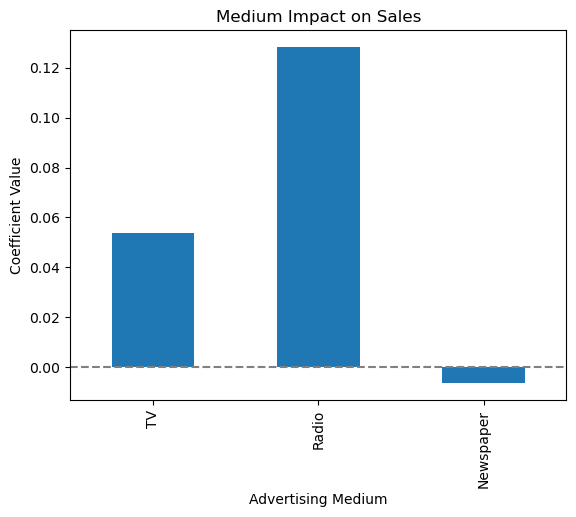

In [39]:
#The MSE for the model  is 3.00 meaning the average squareddifference between the actual sales and the predcted sales is 3. 
# The R^2 score is 0.89 this means that 88.8% of the variance in the sales data is explained by the model​ which is a farly good fit.

#model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

equation = "Sales = {:.2f} + {:.2f}*TV + {:.2f}*Radio + {:.2f}*Newspaper".format(intercept, *slope)
print("\nFitted Model Equation:")
print(equation)


coefficients.plot(kind='bar', legend=False)
plt.title('Medium Impact on Sales')
plt.ylabel('Coefficient Value')
plt.xlabel('Advertising Medium')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

*For each additional unit (thousand dollars) spent on TV advertising, sales increase by approximately 0.054 units (thousand units). This suggests that TV advertising is positively correlated with sales, making it a valuable medium for driving sales.

*Each additional unit spent on Radio advertising results in an increase of about 0.122 units (thousand units) in sales. This coefficient is notably higher than that of TV, indicating that Radio advertising might have a relatively stronger impact on sales compared to TV.

*Interestingly, the coefficient for Newspaper is negative, meaning each additional unit spent on Newspaper advertising is associated with a decrease of approximately 0.006 units (thousand units) in sales. This could suggest that Newspaper advertising may not be effective (or could even be counterproductive) in driving sales for this dataset.

In [36]:
#save the model
import joblib

joblib.dump(model, 'sales_prediction_model.pkl')

['sales_prediction_model.pkl']